In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

In [2]:
# Load CSV file
data = pd.read_csv('fashion_train.csv')

# Prepare data
labels = data['label'].copy().to_numpy()
features = data.drop('label', axis=1).to_numpy()

In [3]:
# Split data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [4]:
# find highest accuracy based on n_estimators
# running this might take up to 40min
# the higher the estimator-value, the longer it will take

accuracies = []

estimator = [10, 25, 50, 100, 250, 500, 1000]

for n in estimator:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train classifier
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with n_estimator={n}: {accuracy}")

max = np.argmax(accuracies)
best_n = estimator[max]
print(f"\nThe highest accuracy is achieved with n={estimator[max]}: {accuracies[max]}")

"""""
    Result: 

    Accuracy with n_estimator=10: 0.8605833333333334
    Accuracy with n_estimator=25: 0.8686666666666667
    Accuracy with n_estimator=50: 0.8743333333333333
    Accuracy with n_estimator=100: 0.8784166666666666
    Accuracy with n_estimator=250: 0.8818333333333334
    Accuracy with n_estimator=500: 0.8818333333333334
    Accuracy with n_estimator=1000: 0.8806666666666667

    The highest accuracy is achieved with n=250: 0.8818333333333334
"""""

Accuracy with n_estimator=10: 0.8605833333333334
Accuracy with n_estimator=25: 0.8686666666666667
Accuracy with n_estimator=50: 0.8743333333333333
Accuracy with n_estimator=100: 0.8784166666666666
Accuracy with n_estimator=250: 0.8818333333333334
Accuracy with n_estimator=500: 0.8818333333333334
Accuracy with n_estimator=1000: 0.8806666666666667

The highest accuracy is achieved with n=250: 0.8818333333333334


In [5]:
# Find highest accuracy based on the test_size

accuracies = []

test_size = [0.1, 0.2, 0.3, 0.4, 0.5]

for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i, random_state=42)

    rf = RandomForestClassifier(n_estimators=best_n, random_state=42)

    # Train classifier
    rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with test_size={i}: {accuracy}")

max = np.argmax(accuracies)
best_test_size = test_size[max]
print(f"The highest accuracy is achieved by the test_size={best_test_size}: {accuracies[max]}")

"""""
Result:

Accuracy with test_size=0.1: 0.8853333333333333
Accuracy with test_size=0.2: 0.8818333333333334
Accuracy with test_size=0.3: 0.8815
Accuracy with test_size=0.4: 0.8769583333333333
Accuracy with test_size=0.5: 0.8781
The highest accuracy is achieved by the test_size=0.1: 0.8853333333333333
"""""

Accuracy with test_size=0.1: 0.8853333333333333
Accuracy with test_size=0.2: 0.8818333333333334
Accuracy with test_size=0.3: 0.8815
Accuracy with test_size=0.4: 0.8769583333333333
Accuracy with test_size=0.5: 0.8781
The highest accuracy is achieved by the test_size=0.1: 0.8853333333333333


In [4]:
# perform random forest classification with best_n and best_test_size

#best_n = 250
#best_test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=best_test_size, random_state=42)

rf = RandomForestClassifier(n_estimators=best_n, random_state=42)

# Train classifier
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8843333333333333


misclassified_indices: [7, 10, 21, 27, 30, 35, 42, 62, 64, 73, 74, 78, 109, 134, 139, 159, 177, 183, 187, 194, 219, 221, 226, 229, 230, 250, 251, 253, 280, 303, 311, 315, 333, 336, 347, 348, 353, 360, 373, 378, 391, 393, 398, 411, 419, 429, 448, 454, 459, 463, 476, 506, 512, 513, 518, 547, 554, 584, 589, 634, 639, 641, 643, 693, 717, 725, 734, 745, 746, 757, 773, 779, 790, 805, 813, 826, 827, 834, 836, 842, 847, 851, 853, 868, 872, 886, 888, 889, 903, 916, 921, 934, 952, 953, 959, 980, 981, 986, 999, 1005, 1008, 1014, 1028, 1040, 1042, 1043, 1054, 1070, 1074, 1078, 1103, 1106, 1129, 1138, 1140, 1144, 1157, 1176, 1177, 1181, 1186, 1189, 1194, 1197, 1204, 1245, 1250, 1261, 1262, 1263, 1269, 1275, 1295, 1296, 1301, 1318, 1321, 1322, 1333, 1334, 1338, 1340, 1364, 1367, 1368, 1372, 1388, 1396, 1397, 1401, 1402, 1421, 1431, 1446, 1463, 1469, 1470, 1474, 1485, 1489, 1522, 1525, 1531, 1535, 1550, 1559, 1560, 1570, 1592, 1605, 1608, 1613, 1616, 1629, 1630, 1638, 1641, 1659, 1665, 1677, 1683, 16

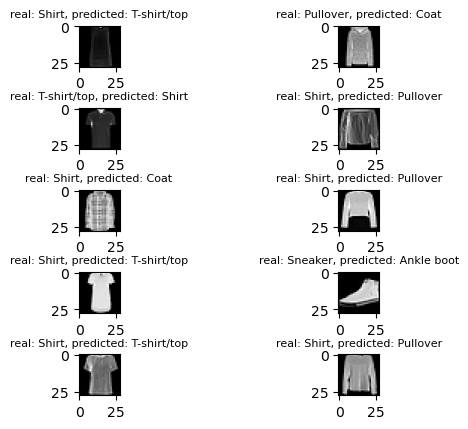

In [7]:
# get missclassified data
import matplotlib.pyplot as plt
import random

# y_test: correct label
# y_pred: predicited label

# Find indices where predicted labels don't match the true labels
misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

print(f"misclassified_indices: {misclassified_indices}")
print(f"number of misclassified images: {len(misclassified_indices)}")
print(f"number of test images: {len(y_test)}")
print(f"accuracy: {1- len(misclassified_indices) / len(y_test)}")


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


random_misclassified_indices = random.sample(misclassified_indices, k=10)
i=1


for id in random_misclassified_indices:
    image = X_test[id].reshape(28, 28)
    label = "real: " + class_names[y_test[id]] + ", predicted: " + class_names[y_pred[id]]
    plt.subplot(5,2,i)
    plt.imshow(image, cmap='gray')
    plt.title("{}".format(label),fontsize=8)
    plt.subplots_adjust(hspace=1, wspace=0.1)
    i+=1
    
   
plt.show()
